<a href="https://colab.research.google.com/github/rohahnbiswas-works/AC-Machines-Fault-Prediction/blob/main/Code/ACMachinesFaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/detect_dataset.csv')
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [ ]:
#data cleaning
df.isnull().sum()
df.drop(['Unnamed: 7', 'Unnamed: 8'], axis=1, errors='ignore', inplace=True)


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
#training the data
x_train,x_test,y_train,y_test = train_test_split(df.drop('Output (S)',axis=1),df['Output (S)'],random_state=42,test_size=0.2)

In [ ]:
#scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#model training
em = pd.DataFrame(columns=['model_name','accuracy','precision','recall'])
#logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
em.loc[em.shape[0]] = ['LogisticRegression',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.81      1306
           1       1.00      0.42      0.60      1095

    accuracy                           0.74      2401
   macro avg       0.84      0.71      0.70      2401
weighted avg       0.82      0.74      0.71      2401



In [ ]:
#decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
em.loc[em.shape[0]] = ['DecisionTreeClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1306
           1       0.99      1.00      0.99      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [ ]:
#svm
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
em.loc[em.shape[0]] = ['SVC',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1306
           1       1.00      0.97      0.98      1095

    accuracy                           0.98      2401
   macro avg       0.99      0.98      0.98      2401
weighted avg       0.98      0.98      0.98      2401



In [ ]:
#k-means classification
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
em.loc[em.shape[0]] = ['KNeighborsClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



In [ ]:
#random forest classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
em.loc[em.shape[0]] = ['RandomForestClassifier',accuracy_score(y_test,y_pred),precision_score(y_test,y_pred),recall_score(y_test,y_pred)]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1306
           1       1.00      1.00      1.00      1095

    accuracy                           1.00      2401
   macro avg       1.00      1.00      1.00      2401
weighted avg       1.00      1.00      1.00      2401



  Actual Status Predicted Status
0      No Fault         No Fault
1         Fault            Fault
2      No Fault         No Fault
3      No Fault         No Fault
4      No Fault         No Fault

Prediction Counts:
Predicted Status
No Fault    1341
Fault       1060
Name: count, dtype: int64


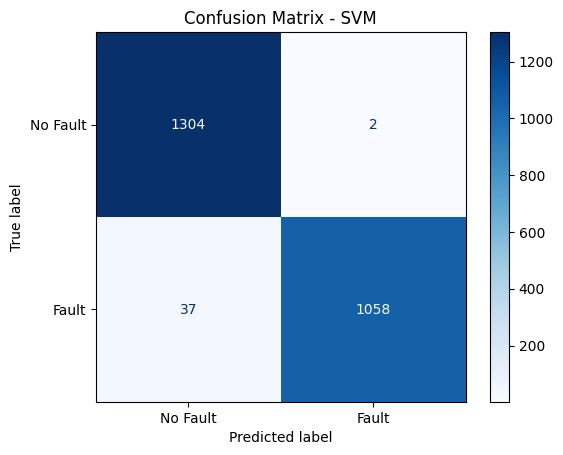

In [ ]:
# Get predictions for the test set using Logistic Regression
y_pred_fault = sv.predict(x_test)

# Map the output to "Fault" or "No Fault" based on the prediction
fault_mapping = {0: "No Fault", 1: "Fault"}  # Adjust keys as per your dataset's output labels
fault_status = [fault_mapping[label] for label in y_pred_fault]

# Create a DataFrame to display actual vs predicted statuses
output_df = pd.DataFrame({
    'Actual Status': [fault_mapping[label] for label in y_test],
    'Predicted Status': fault_status
})

# Display the first few rows of the DataFrame
print(output_df.head())

# Check the count of Fault and No Fault predictions
print("\nPrediction Counts:")
print(output_df['Predicted Status'].value_counts())

# Save the results to a CSV file for review (optional)
output_df.to_csv('fault_predictions.csv', index=False)

# If you want to analyze further, you can compute confusion matrix and plot it
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(sv, x_test, y_test, display_labels=['No Fault', 'Fault'], cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


In [ ]:
# Testing with Sample Inputs
sample_input = [
    [0.5, 0.6, 0.7, 230, 231, 229],  # Example 1
    [1.2, 1.1, 1.3, 220, 218, 219],  # Example 2
    [0.0, 0.1, 0.1, 240, 242, 243],  # Example 3
]

# Scale the sample inputs
sample_input_scaled = sc.transform(sample_input)

# Predict with SVM
sample_predictions_svm = sv.predict(sample_input_scaled)

# Map predictions to "Fault" or "No Fault"
fault_mapping = {0: "No Fault", 1: "Fault"}
sample_status_svm = [fault_mapping[pred] for pred in sample_predictions_svm]

# Display results for sample inputs
for i, (inp, status) in enumerate(zip(sample_input, sample_status_svm), 1):
    print(f"Sample {i}: Input {inp} => Predicted Status: {status}")

Sample 1: Input [0.5, 0.6, 0.7, 230, 231, 229] => Predicted Status: Fault
Sample 2: Input [1.2, 1.1, 1.3, 220, 218, 219] => Predicted Status: Fault
Sample 3: Input [0.0, 0.1, 0.1, 240, 242, 243] => Predicted Status: Fault


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters from RandomizedSearchCV: {'C': 7.896910002727692, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1306
           1       0.99      1.00      0.99      1095

    accuracy                           1.00      2401
   macro avg       0.99      1.00      0.99      2401
weighted avg       1.00      1.00      1.00      2401

  Actual Status Predicted Status
0      No Fault         No Fault
1         Fault            Fault
2      No Fault         No Fault
3      No Fault         No Fault
4      No Fault         No Fault


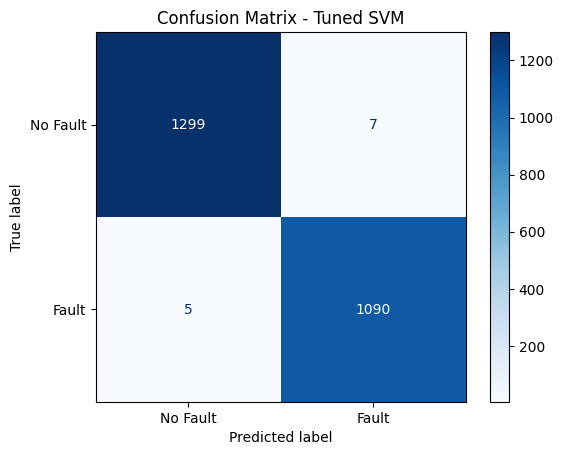

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distribution (using uniform distribution for 'C' and 'gamma')
param_dist = {
    'C': uniform(0.1, 10),  # Randomly sample C between 0.1 and 10
    'kernel': ['linear', 'rbf','poly'],  # Use 'linear' or 'rbf' kernels
    'gamma': ['scale', 'auto'],  # 'scale' or 'auto' for gamma
    'class_weight': [None, 'balanced']  # Include 'balanced' class weights
}

# Initialize the SVM model
svm_model = SVC()

# Apply RandomizedSearchCV with 10 iterations
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search.fit(x_train, y_train)

# Get the best parameters from the random search
best_params = random_search.best_params_
print("\nBest Hyperparameters from RandomizedSearchCV:", best_params)

# Use the best model from the random search
svm_model_best = random_search.best_estimator_

# Train the model with the best hyperparameters
svm_model_best.fit(x_train, y_train)

# Evaluate the tuned model on the test set
y_pred = svm_model_best.predict(x_test)
print(classification_report(y_test, y_pred))

# Get predictions for the test set using the best tuned SVM model
y_pred_fault = svm_model_best.predict(x_test)

# Map the output to "Fault" or "No Fault" based on the prediction
fault_mapping = {0: "No Fault", 1: "Fault"}  # Adjust keys as per your dataset's output labels
fault_status = [fault_mapping[label] for label in y_pred_fault]

# Create a DataFrame to display actual vs predicted statuses
output_df = pd.DataFrame({
    'Actual Status': [fault_mapping[label] for label in y_test],
    'Predicted Status': fault_status
})

# Display the first few rows of the DataFrame
print(output_df.head())

# Save the results to a CSV file for review (optional)
output_df.to_csv('fault_predictions_tuned_random_search.csv', index=False)

# If you want to analyze further, you can compute confusion matrix and plot it
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm_model_best, x_test, y_test, display_labels=['No Fault', 'Fault'], cmap='Blues')
plt.title("Confusion Matrix - Tuned SVM")
plt.show()



In [ ]:
# Fault mapping
fault_mapping = {0: "No Fault", 1: "Fault"}

# Sample Inputs
sample_input = [
    [0.2, 120, 0.5, 230, 0, 230],
    [0.5, 0.1, 0.4, 242, 262, 250],
    [0.6, 0.5, 0.3, 256, 224, 246],
    [120, 52, 48, 0, 0, 230]
]

# Function to check for logical errors
def validate_sample(sample):
    if all(val > 50 for val in sample[:3]) and all(0 <= val <= 1 for val in sample[3:]):
        return True  # Logical error condition met
    return False

# Initialize an empty list for results
sample_status_svm = []

# Process each sample
for i, inp in enumerate(sample_input, 1):
    if validate_sample(inp):
        print(f"Sample {i}: Input {inp} => ERROR: Invalid Input Conditions")
        sample_status_svm.append("ERROR")
    else:
        # Scale the input
        sample_scaled = sc.transform([inp])

        # Predict the status
        prediction = svm_model_best.predict(sample_scaled)[0]
        status = fault_mapping[prediction]
        sample_status_svm.append(status)

        # Display the result
        print(f"Sample {i}: Input {inp} => Predicted Status: {status}")


Sample 1: Input [0.2, 120, 0.5, 230, 0, 230] => Predicted Status: No Fault
Sample 2: Input [0.5, 0.1, 0.4, 242, 262, 250] => Predicted Status: No Fault
Sample 3: Input [0.6, 0.5, 0.3, 256, 224, 246] => Predicted Status: No Fault
Sample 4: Input [120, 52, 48, 0, 0, 230] => Predicted Status: No Fault


In [ ]:
# Fault mapping
fault_mapping = {0: "No Fault", 1: "Fault"}

# Sample Inputs
sample_input = [
    [0.2, 120, 0.5, 230, 0, 230],
    [0.5, 0.1, 0.4, 242, 262, 250],
    [0.6, 0.5, 0.3, 256, 224, 246],
    [120, 52, 48, 0, 0, 230]
]

# Function to check for logical errors
def validate_sample(sample):
    # If the first three values are >50 and the next three are between 0 and 1
    if all(val > 50 for val in sample[:3]) and all(0 <= val <= 1 for val in sample[3:]):
        return True  # Flag as invalid
    return False

# Results
sample_status_svm = []

# Process each sample
for i, inp in enumerate(sample_input, 1):
    if validate_sample(inp):
        print(f"Sample {i}: Input {inp} => ERROR: Invalid Input Conditions")
        sample_status_svm.append("ERROR")
    else:
        # Scale the input
        sample_scaled = sc.transform([inp])

        # Predict the status
        prediction = svm_model_best.predict(sample_scaled)[0]
        status = fault_mapping[prediction]
        sample_status_svm.append(status)

        # Display the result
        print(f"Sample {i}: Input {inp} => Predicted Status: {status}")


Sample 1: Input [0.2, 120, 0.5, 230, 0, 230] => Predicted Status: No Fault
Sample 2: Input [0.5, 0.1, 0.4, 242, 262, 250] => Predicted Status: No Fault
Sample 3: Input [0.6, 0.5, 0.3, 256, 224, 246] => Predicted Status: No Fault
Sample 4: Input [120, 52, 48, 0, 0, 230] => Predicted Status: No Fault
